In [1]:
## Load Statistics
from lenskit import topn
from lenskit.metrics.topn import ndcg
import pandas as pd
from matplotlib import pyplot as plt
from lenskit.metrics.predict import rmse
from IPython.display import set_matplotlib_formats

all_recs = pd.read_csv('output/trst/recs.csv')
test_data = pd.read_csv('output/trst/testdata.csv')
preds = pd.read_csv('output/trst/preds.csv')
all_recs.head()

,item,score,user,rank,Algorithm
0,55,2.468283,9,1,trst
1,119,2.249283,9,2,trst
2,51,2.205595,72,1,trst
3,86,3.208244,77,1,trst
4,51,2.633013,77,2,trst


In [7]:
rla = topn.RecListAnalysis()
rla.add_metric(topn.ndcg)
results = rla.compute(all_recs, test_data)
results.head()

,,nrecs,ndcg
user,Algorithm,,
8,trst,3.0,0.00000
9,trst,2.0,0.00000
47,trst,15.0,0.00000
54,trst,6.0,0.63093
56,trst,5.0,0.00000


In [3]:
results.groupby('Algorithm').ndcg.mean()

Algorithm
trst    0.132177
Name: ndcg, dtype: float64

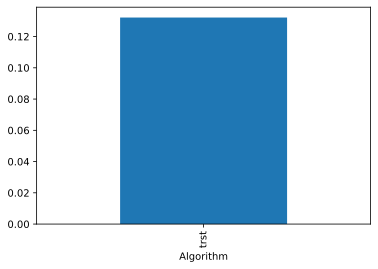

In [4]:
set_matplotlib_formats('svg')
results.groupby('Algorithm').ndcg.mean().plot.bar()

[0.49295015 0.88185414 0.79273197 0.1875     0.63782326 0.25833333
 0.41928571 0.30333333 0.3547245  0.08758412 0.10345423 0.20159541
 0.23594379 0.51254926 0.48733422 0.36235383 0.27343361 0.49523375
 0.7666172  0.13833333 0.23       0.56685607 0.70362982 0.56388889
 0.66888889 0.12363092 0.16487739 0.13792249 0.22708611 0.3885
 0.56794007 0.16424983 0.12184795 0.78434009 0.65423872 0.27783728
 0.70987743 0.34       0.28       0.88272759 0.29708937 0.24231127
 0.55445704 0.41779507 0.22541176 0.58261145 0.16888889 0.84040387
 0.41882889 0.33111111 0.49299359 0.47243456 0.477667   0.59395911
 0.19188107 0.60572362 0.64418178 0.17183722 0.51396361 0.67665293
 0.49228422 0.48569505 0.63564322 0.50300365 0.24749818 0.82613942
 0.33563885 0.62624602 0.85473214]
max rmse per user = 0.8827275899469023, min rmse per user = 0.0875841227624172, average rmse per user = 0.44171583560954825


{'whiskers': [<matplotlib.lines.Line2D at 0x12d1fe210>,
 'caps': [<matplotlib.lines.Line2D at 0x12d1fec50>,
 'boxes': [<matplotlib.lines.Line2D at 0x12d128750>],
 'medians': [<matplotlib.lines.Line2D at 0x12d2056d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x12d205bd0>],
 'means': []}

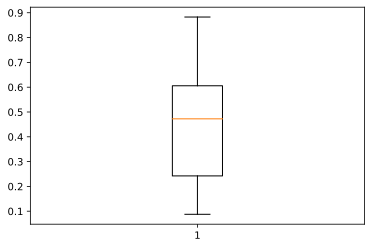

In [15]:
user_rmse = preds.groupby('user').apply(lambda df: rmse(df.prediction, df.rating))
#user_rmse.fillna(0, inplace=True)
user_rmse = user_rmse.dropna()
print(user_rmse.values)
print('max rmse per user = ' + str(user_rmse.max()) + ', min rmse per user = ' + str(user_rmse.min()) + ', average rmse per user = ' + str(user_rmse.mean()))
plt.boxplot(user_rmse.values)


